In [1]:
# Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
df = pd.read_csv("/Users/tony/Desktop/Career Foundry/Achievement 6/Superstore_cleaned.csv", encoding='latin1')

In [3]:
df.head(10)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
5,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Consumer,United States,Los Angeles,California,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656
7,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Consumer,United States,Los Angeles,California,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152
8,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Consumer,United States,Los Angeles,California,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,0.20,5.7825
9,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Consumer,United States,Los Angeles,California,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5,0.00,34.4700


### Correlation Heatmap 

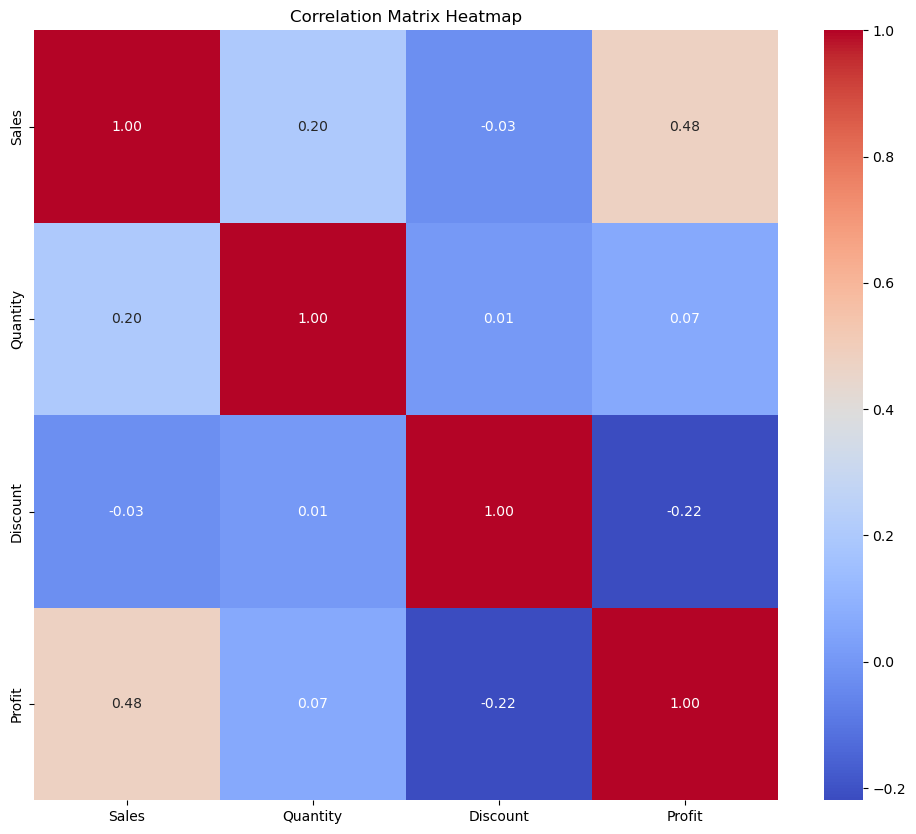

In [13]:
# Remove the columns 'Row ID', 'Customer Name', and 'Postal Code'
df_heatmap = df.drop(columns=['Postal Code'])

# Select only numeric columns
numeric_df = df_heatmap.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

Key Insights:

The strongest positive correlation observed is between sales and profit (0.48), indicating that these two variables are moderately related.
The relationship between discount and profit is negative, suggesting that higher discounts can reduce profits, which aligns with typical business expectations.
The other relationships are relatively weak, indicating that factors like quantity and discount do not strongly correlate with each other or with other variables in a linear manner.

## Scatterplot Sales & Profit

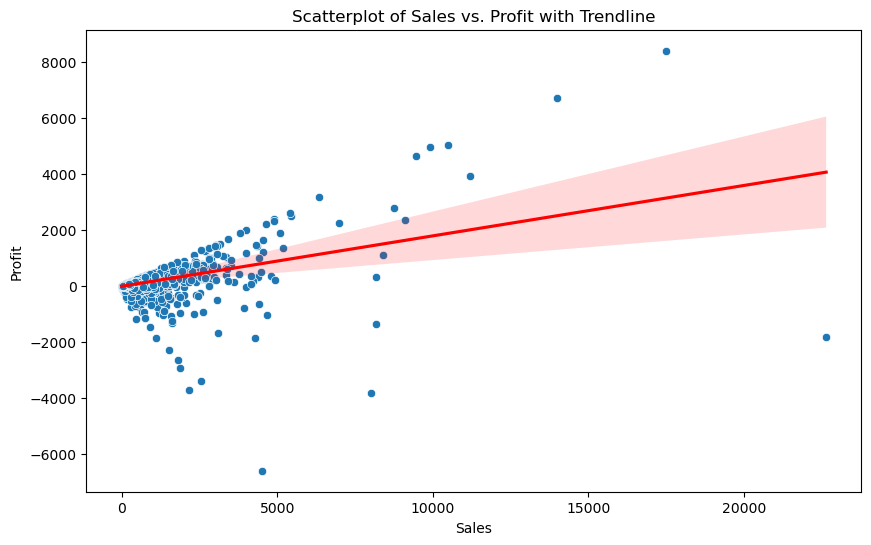

In [15]:
# Scatterplot for Sales vs. Profit with a trendline
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sales', y='Profit', data=df)
sns.regplot(x='Sales', y='Profit', data=df, scatter=False, color='red')
plt.title('Scatterplot of Sales vs. Profit with Trendline')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()


The positive correlation (as seen from the trendline) suggests that, generally, higher sales are associated with higher profits. However, the variability in the data, particularly the presence of outliers and the spread of profit values for higher sales, indicates that other factors might influence profit. The presence of negative profits also suggests that not all sales transactions are profitable, which could be due to discounts.

/Users/tony/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/9t/93g16rhd6xs10r5xlzdwgy4h0000gn/T/ipykernel_29363/3859214201.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


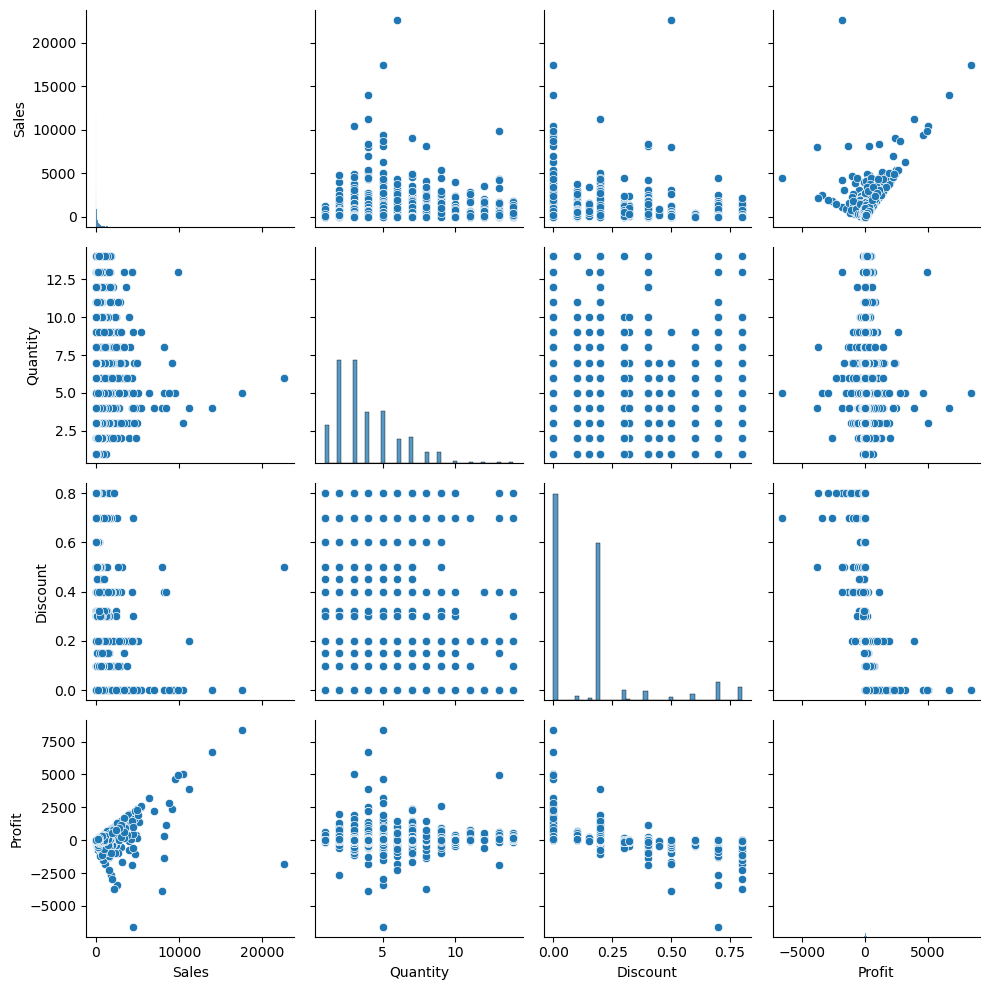

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select specific numeric columns for the pair plot
sub_2 = df[['Sales', 'Quantity', 'Discount', 'Profit']]

# Create a pair plot of the selected columns
g = sns.pairplot(sub_2)

# Adjust the layout to ensure it fits well
plt.tight_layout()

# Display the plot
plt.show()


Observations:

Sales vs. Profit:

There is a noticeable positive correlation between Sales and Profit, as indicated by the scatter plot. As sales increase, profit generally increases as well.
There are a few outliers with very high sales and varying profit values.

Quantity vs. Sales:

The scatter plot shows a weak positive relationship between Quantity and Sales. Higher quantities generally correspond to higher sales, but the relationship is not very strong.
There are clusters of data points at specific quantities, suggesting common order sizes.

Quantity vs. Profit:

The scatter plot shows a weak positive relationship between Quantity and Profit. Higher quantities sometimes result in higher profits, but this relationship is not consistent.

Discount vs. Profit:

There is a negative correlation between Discount and Profit. As discounts increase, profits tend to decrease, which is expected as discounts reduce the profit margin.
The scatter plot shows that most discounts are clustered around specific values (e.g., 0%, 20%, 40%, 60%, 80%).

Discount vs. Sales:

There is no clear relationship between Discount and Sales. The scatter plot shows that sales are distributed across various discount levels.

Quantity vs. Discount:

The scatter plot indicates no clear relationship between Quantity and Discount. Discounts are spread across various quantities.


Variables to Explore Further:

Sales and Profit:
The positive correlation between Sales and Profit warrants further exploration to understand the factors driving high sales and high profits.

Discount and Profit:
The negative correlation between Discount and Profit suggests that higher discounts reduce profit margins. Exploring the impact of different discount levels on profit can help in optimizing discount strategies to balance sales volume and profitability.

/var/folders/9t/93g16rhd6xs10r5xlzdwgy4h0000gn/T/ipykernel_29363/1441216910.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(x="Category", y="Profit", hue="Region", data=df, kind="bar", ci=None)
/Users/tony/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


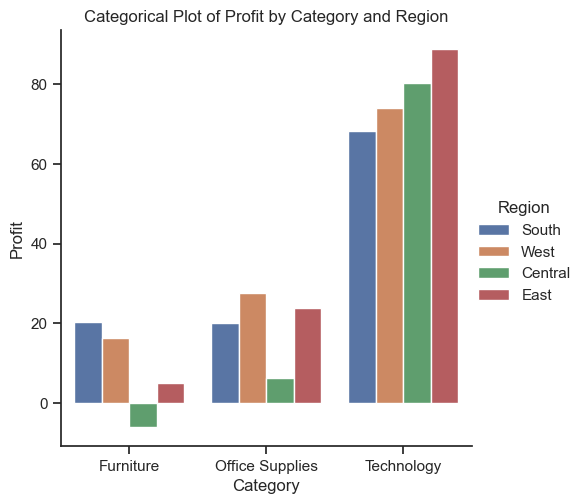

In [23]:
# Create a categorical plot without confidence intervals
sns.set(style="ticks")
g = sns.catplot(x="Category", y="Profit", hue="Region", data=df, kind="bar", ci=None)
plt.title('Categorical Plot of Profit by Category and Region')
plt.xlabel('Category')
plt.ylabel('Profit')
plt.show()


The Technology category emerges as a high-performing segment, while Office Supplies shows stable but moderate performance. The Furniture category requires strategic intervention to enhance profitability, especially in the Central region. By leveraging these insights, the business can make informed decisions to optimize product and regional strategies.

## Questions 

Which product categories and sub-categories generate the most revenue?

Current Findings:
Top-performing Categories: Based on the categorical plot, the Technology category generates the highest profit across all regions.
Sub-categories: Further detailed analysis is needed to break down the performance of sub-categories.
New Questions:
Are there specific sub-categories within Technology driving the high profits?


What are the profit margins across different product categories?

Current Findings:
Most Profitable Categories: The Technology category shows the highest profits.
Least Profitable Categories: The Furniture category has lower profits, with even some losses in certain regions.
New Questions:
What specific products within Technology have the highest profit margins?
How can the profitability of the Furniture category be improved?

Which regions and cities generate the most sales and profit?

Current Findings:
Top-performing Regions: Based on the categorical plot, the West region shows the highest profits for the Technology category.
Regional Trends: There are significant differences in profitability across regions, especially for the Furniture category.
New Questions:
Which specific cities within the top-performing regions are driving these profits?
Are there particular regional factors contributing to the differences in sales and profit?



## Hypothesis

Hypothesis 1: The West region generates the highest sales and profit compared to other regions. 

Hypothesis 2: The Technology category has higher profit margins compared to Furniture and Office Supplies.